In [170]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [126]:
df=load_iris()

In [127]:
new_df=pd.DataFrame(columns=df.feature_names,data=df.data)

In [128]:
new_df['target']=df.target

In [129]:
new_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [130]:
X=new_df.iloc[:,[2,3]]
y=new_df.iloc[:,-1]

In [131]:
from sklearn.model_selection import train_test_split

In [144]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape

(120, 2)

In [156]:
clf=DecisionTreeClassifier(max_depth=2)

In [157]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [158]:
y_pred=clf.predict(X_test)

In [159]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [160]:
print("accuracy is :",accuracy_score(y_test,y_pred))

accuracy is : 0.9666666666666667


In [161]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [162]:
from matplotlib import pyplot as plt

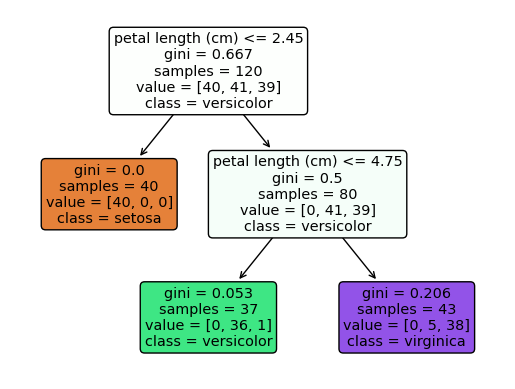

In [163]:
# Plot the decision tree
plot_tree(
    clf, 
    feature_names=new_df.columns.tolist()[2:-1], 
    class_names=df.target_names, 
    rounded=True, 
    filled=True
)

# Show the plot
plt.show()

In [164]:
new_df.columns.tolist()[2:-1]

['petal length (cm)', 'petal width (cm)']

In [179]:
np.argmax(clf.predict_proba([[5, 1.5]]))


C:\Users\sy669\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


2

In [180]:
from sklearn.model_selection import GridSearchCV

In [181]:
param_grid = {
    'criterion': ['gini', 'entropy'],               # Split criterion
    'max_depth': [None,5, 7, 10, ],                # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],                  # Minimum samples required at a leaf node
    'max_features': [None, 'sqrt', 'log2'],         # Number of features to consider for best split
}

In [182]:
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1,n_jobs=-1)


In [183]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=2), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 7, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [184]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Accuracy: 0.9583333333333334


In [187]:
best_model=grid_search.best_estimator_
accuracy=best_model.score(X_test,y_test)

In [188]:
print(accuracy)

1.0


C:\Users\sy669\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

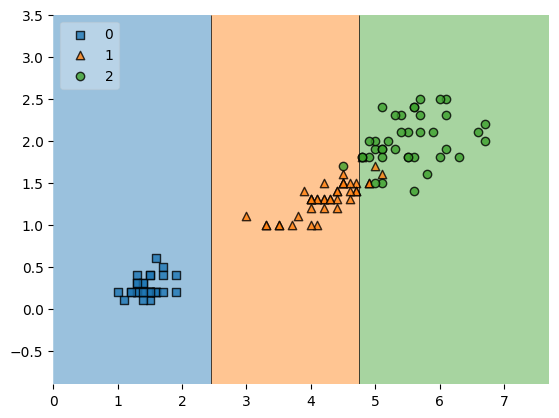

In [196]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(np.array(X_train), np.array(y_train), clf=clf, legend=2)